# Import Necessary Package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pywt

# Load Data from CSV

I01
I02
I03
I04
I05
I06
I07
I08
I09
I10
I11
I12
I13
I14
I15
I16
I17
I18
I19
I20
I21
I22
I23
I24
I25
I26
I27
I28
I29
I30
I31
I32
I33
I34
I35
I36
I37
I38
I39
I40
I41
I42
I43
I44
I45
I46
I47
I48
I49
I50
I51
I52
I53
I54
I55
I56
I57
I58
I59
I60
I61
I62
I63
I64
I65
I66
I67
I68
I69
I70
I71
I72
I73
I74
I75


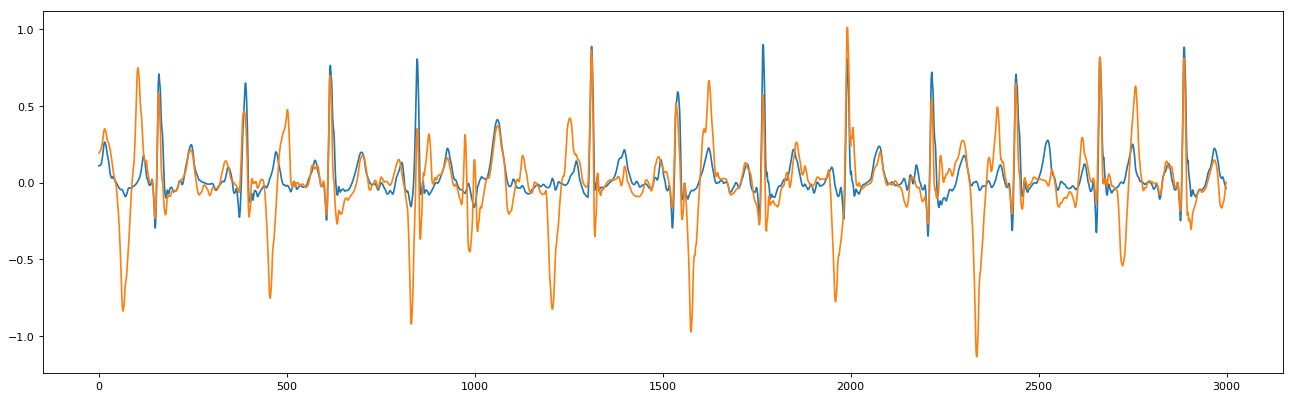

In [2]:
INCART = []
for i in range(1, 76):
    if i < 10:
        INCART.append('I0' + str(i))
    else:
        INCART.append('I' + str(i))


INCARTSet_leads = {}
INCARTSet_anns = {}
for ds in INCART:
    print(ds)
    INCARTSet_leads[ds] = pd.read_csv('D:/Data/Cleaned Data/INCART/' + ds + '_lead.csv')
    INCARTSet_anns[ds] = pd.read_csv('D:/Data/Cleaned Data/INCART/' + ds + '_ann.csv')

# 测试读取情况
plt.figure(figsize=(20, 6), dpi=80)
plt.plot(INCARTSet_leads['I01'][:3000])
plt.show()

# Heartbeat Annotation

In [3]:
N = ['N', 'L', 'R', 'e', 'j']
SVEB = ['A', 'a', 'J', 'S']
VEB = ['V', 'E']
F = ['F']
Q = ['P', 'f', 'U']
Non_beat_anns = ['[', ']', '!', 'x', '(', ')', 'p', 't', 'u', '`', '~', '^', '|', '+', 's', 'T', '*', 'D', '=', '"', '@']

# Heatbeat Segmentation

For each heartbeat knowing the R location, we take samples from the interval of 250 ms before R peak and 400 ms after R peak, i.e. total 0.65 s of each heartbeat. That is, 90 samples before R peak and 144 samples after R peak.

In [4]:
Hbs = {}
for ds in INCART:
    lead0 = INCARTSet_leads[ds]['lead0']
    lead1 = INCARTSet_leads[ds]['lead1']
    hbs0 = []
    hbs1 = []
    anns = []
    annIdxs = []
    for row in INCARTSet_anns[ds].itertuples():
        if row[2] in Non_beat_anns:
            continue
        elif row[1] < 91:
            continue
        elif row[1] + 144 > len(lead0):
            continue
        else:
            anns.append(row[2])
            annIdxs.append(row[1] - 1)
            hbs0.append(lead0[row[1] - 91: row[1] + 144])
            hbs1.append(lead1[row[1] - 91: row[1] + 144])
    Hbs[ds] = pd.DataFrame({'lead0': hbs0, 'lead1': hbs1, 'ann': anns, 'annIdx': annIdxs})

In [5]:
Hbs['I01'].head(10)

,ann,annIdx,lead0,lead1
0,N,157,67 -0.072184 68 -0.079161 69 -0.08707...,67 -0.802396 68 -0.766606 69 -0.71385...
1,N,384,294 -0.010422 295 -0.010120 296 -0.00968...,294 -0.083253 295 -0.083873 296 -0.08252...
2,N,613,523 -0.012985 524 -0.022349 525 -0.03460...,523 -0.019874 524 -0.014281 525 -0.00631...
3,N,844,754 -0.009078 755 -0.011487 756 -0.01667...,754 0.026075 755 0.024054 756 0.01839...
4,V,986,896 -0.002102 897 -0.000952 898 -0.00...,896 0.028959 897 0.018565 898 0.01...
5,N,1307,1217 -0.038718 1218 -0.032188 1219 -0.02...,1217 -0.408324 1218 -0.385357 1219 -0.35...
6,N,1536,1446 -0.016388 1447 -0.015102 1448 -0.01...,1446 -0.063968 1447 -0.057260 1448 -0.04...
7,N,1762,1672 -0.004687 1673 -0.012817 1674 -0.02...,1672 0.003284 1673 -0.005692 1674 -0.01...
8,N,1993,1903 -6.728103e-02 1904 -6.362176e-02 1905...,1903 -0.010080 1904 -0.005827 1905 -0.00...
9,N,2217,2127 -0.014255 2128 -0.013798 2129 -0.01...,2127 -0.024203 2128 -0.026182 2129 -0.02...


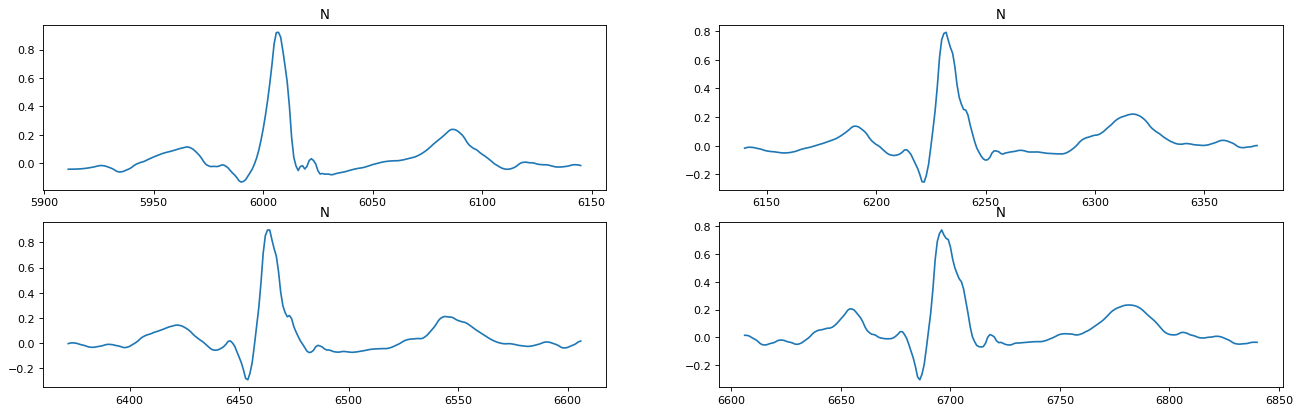

In [6]:
hb_num = 26
hb_set = 'I01'
plt.figure(figsize=(20, 6), dpi=80)
p1 = plt.subplot(221)
p1.plot(Hbs[hb_set]['lead0'][hb_num])
p1.set_title(Hbs[hb_set]['ann'][hb_num])
p2 = plt.subplot(222)
p2.plot(Hbs[hb_set]['lead0'][hb_num+1])
p2.set_title(Hbs[hb_set]['ann'][hb_num+1])
p3 = plt.subplot(223)
p3.plot(Hbs[hb_set]['lead0'][hb_num+2])
p3.set_title(Hbs[hb_set]['ann'][hb_num+2])
p4 = plt.subplot(224)
p4.plot(Hbs[hb_set]['lead0'][hb_num+3])
p4.set_title(Hbs[hb_set]['ann'][hb_num+3])
plt.show()

# Checking Overall Distribution of Lead0 and Lead1

ann:  {'N', 'V'}
Heartbeats amount:  2673


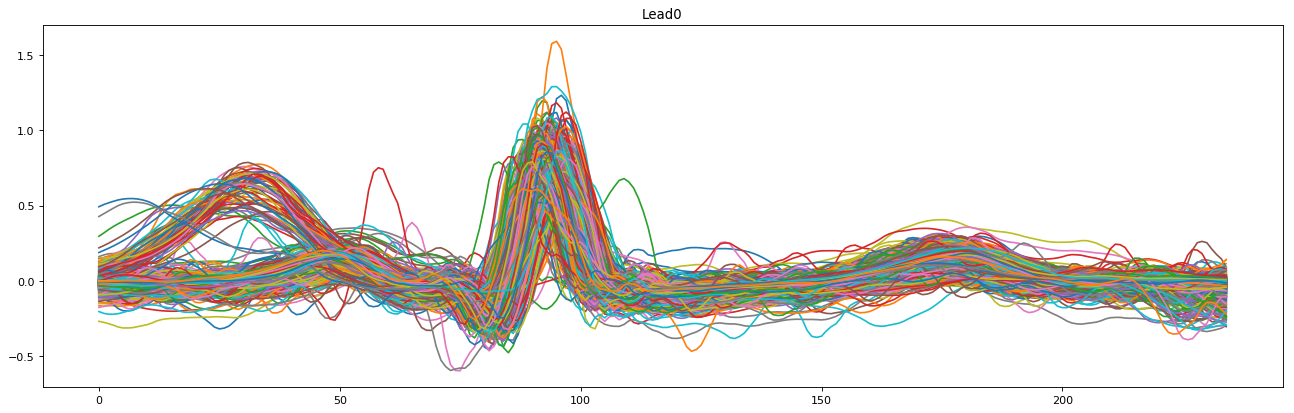

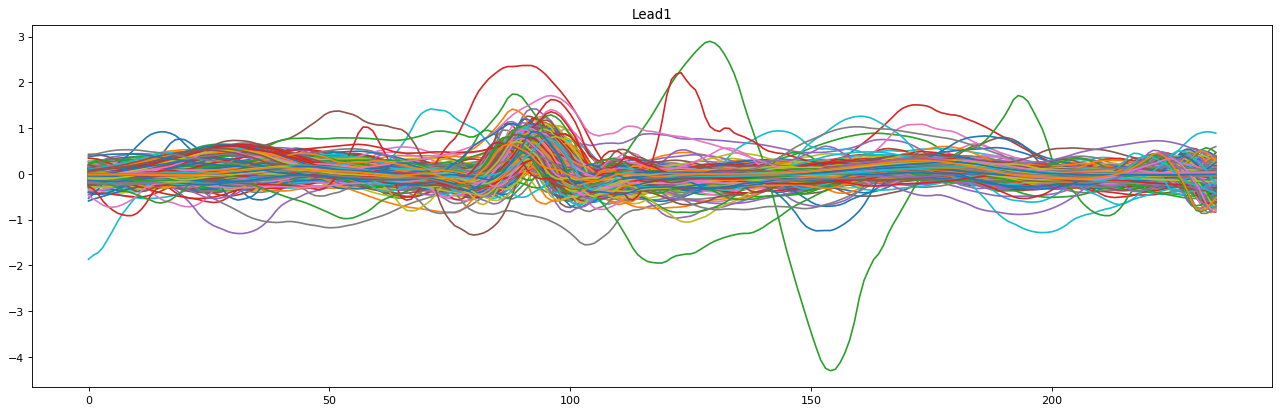

In [7]:
ds = 'I02'
print('ann: ', set(Hbs[ds]['ann']))
print('Heartbeats amount: ', len(Hbs[ds]))

plt.figure(figsize=(20, 6), dpi=80)
plt.title('Lead0')
for i in range(len(Hbs[ds]) - 1000):
    if Hbs[ds]['ann'][i] in N:
        beat = Hbs[ds]['lead0'][i]
        temp = pd.Series(list(beat))
        plt.plot(temp)
plt.show()

plt.figure(figsize=(20, 6), dpi=80)
plt.title('Lead1')
for i in range(len(Hbs[ds]) - 1000):
    if Hbs[ds]['ann'][i] in N:
        beat = Hbs[ds]['lead1'][i]
        temp = pd.Series(list(beat))
        plt.plot(temp)
plt.show()

ann:  {'A', 'N', 'V'}
Heartbeats amount:  2451


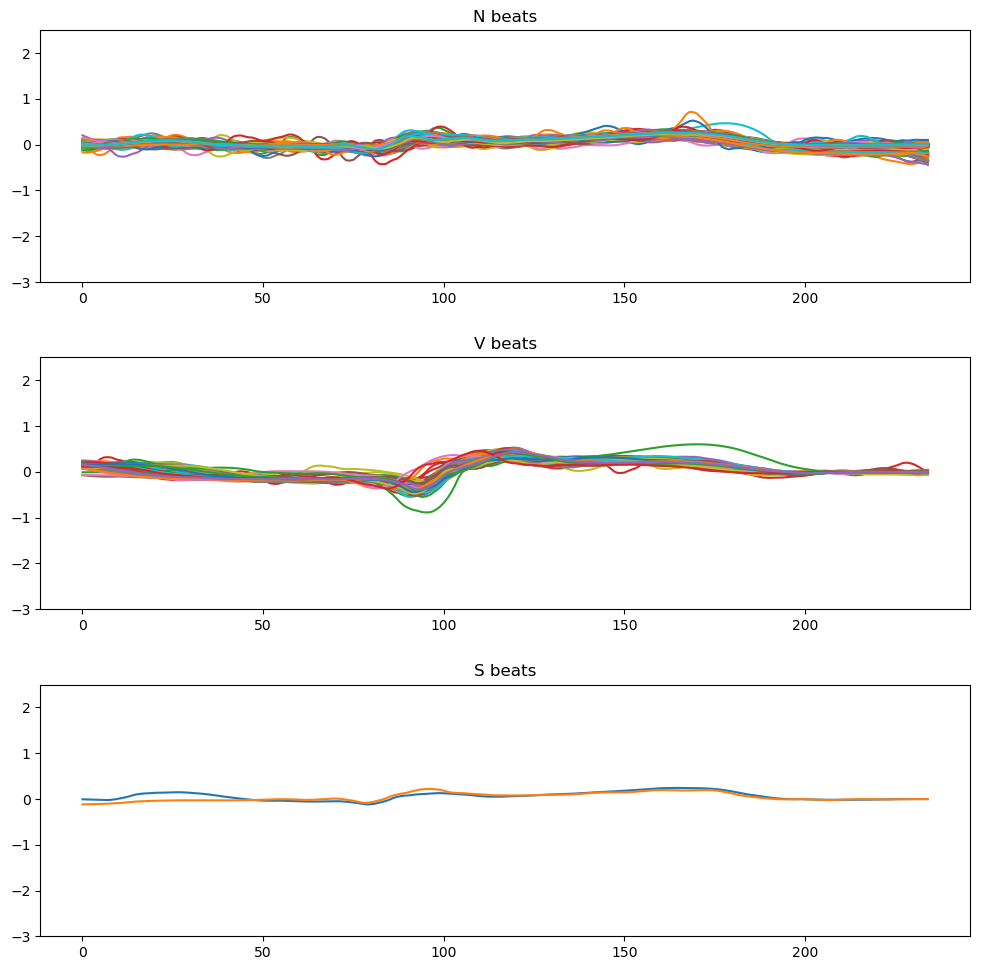

In [8]:
ds = 'I03'
print('ann: ', set(Hbs[ds]['ann']))
print('Heartbeats amount: ', len(Hbs[ds]))

plt.figure(figsize=(12, 12), dpi=100)
plt.subplots_adjust(wspace =0, hspace =0.3)
p1 = plt.subplot(311)
p1.set_title('N beats')
p1.set_ylim(-3, 2.5)
p2 = plt.subplot(312)
p2.set_title('V beats')
p2.set_ylim(-3, 2.5)
p3 = plt.subplot(313)
p3.set_title('S beats')
p3.set_ylim(-3, 2.5)

for i in range(len(Hbs[ds]) - 1000):
    if Hbs[ds]['ann'][i] in N:
        beat = Hbs[ds]['lead1'][i]
        temp = pd.Series(list(beat))
        p1.plot(temp)
for i in range(len(Hbs[ds])):
    if Hbs[ds]['ann'][i] in VEB:
        beat = Hbs[ds]['lead1'][i]
        temp = pd.Series(list(beat))
        p2.plot(temp)
for i in range(len(Hbs[ds])):
    if Hbs[ds]['ann'][i] in SVEB:
        beat = Hbs[ds]['lead1'][i]
        temp = pd.Series(list(beat))
        p3.plot(temp)
plt.show()

# Computing RR Intervals

In [9]:
for ds in INCART:
    dsLast = len(Hbs[ds]['annIdx']) - 1
    preRR = [np.NAN]
    postRR = [Hbs[ds]['annIdx'][1] - Hbs[ds]['annIdx'][0]]
    for l in range(1, dsLast):
        preRR.append(Hbs[ds]['annIdx'][l] - Hbs[ds]['annIdx'][l-1])
        postRR.append(Hbs[ds]['annIdx'][l+1] - Hbs[ds]['annIdx'][l])
    preRR.append(Hbs[ds]['annIdx'][dsLast] - Hbs[ds]['annIdx'][dsLast-1])
    postRR.append(np.NAN)
    Hbs[ds]['preRR'] = preRR
    Hbs[ds]['postRR'] = postRR

In [10]:
Hbs['I01'].head(10)

,ann,annIdx,lead0,lead1,preRR,postRR
0,N,157,67 -0.072184 68 -0.079161 69 -0.08707...,67 -0.802396 68 -0.766606 69 -0.71385...,NaN,227.0
1,N,384,294 -0.010422 295 -0.010120 296 -0.00968...,294 -0.083253 295 -0.083873 296 -0.08252...,227.0,229.0
2,N,613,523 -0.012985 524 -0.022349 525 -0.03460...,523 -0.019874 524 -0.014281 525 -0.00631...,229.0,231.0
3,N,844,754 -0.009078 755 -0.011487 756 -0.01667...,754 0.026075 755 0.024054 756 0.01839...,231.0,142.0
4,V,986,896 -0.002102 897 -0.000952 898 -0.00...,896 0.028959 897 0.018565 898 0.01...,142.0,321.0
5,N,1307,1217 -0.038718 1218 -0.032188 1219 -0.02...,1217 -0.408324 1218 -0.385357 1219 -0.35...,321.0,229.0
6,N,1536,1446 -0.016388 1447 -0.015102 1448 -0.01...,1446 -0.063968 1447 -0.057260 1448 -0.04...,229.0,226.0
7,N,1762,1672 -0.004687 1673 -0.012817 1674 -0.02...,1672 0.003284 1673 -0.005692 1674 -0.01...,226.0,231.0
8,N,1993,1903 -6.728103e-02 1904 -6.362176e-02 1905...,1903 -0.010080 1904 -0.005827 1905 -0.00...,231.0,224.0
9,N,2217,2127 -0.014255 2128 -0.013798 2129 -0.01...,2127 -0.024203 2128 -0.026182 2129 -0.02...,224.0,222.0


# Skewness and Kurtosis Calculation

In [11]:
for ds in INCART:
    dsLength = len(Hbs[ds]['annIdx'])
    skewness_0 = []
    kurtosis_0 = []
    skewness_1 = []
    kurtosis_1 = []
    for l in range(0, dsLength):
        skewness_0.append(Hbs[ds]['lead0'][l].skew())
        skewness_1.append(Hbs[ds]['lead1'][l].skew())
        kurtosis_0.append(Hbs[ds]['lead0'][l].kurt())
        kurtosis_1.append(Hbs[ds]['lead1'][l].kurt())
    Hbs[ds]['skewness_0'] = skewness_0
    Hbs[ds]['skewness_1'] = skewness_1
    Hbs[ds]['kurtosis_0'] = kurtosis_0
    Hbs[ds]['kurtosis_1'] = kurtosis_1

In [12]:
Hbs['I01'].head(10)

,ann,annIdx,lead0,lead1,preRR,postRR,skewness_0,skewness_1,kurtosis_0,kurtosis_1
0,N,157,67 -0.072184 68 -0.079161 69 -0.08707...,67 -0.802396 68 -0.766606 69 -0.71385...,NaN,227.0,2.110229,0.094436,5.983733,2.011995
1,N,384,294 -0.010422 295 -0.010120 296 -0.00968...,294 -0.083253 295 -0.083873 296 -0.08252...,227.0,229.0,2.441247,-0.723529,7.043273,1.848089
2,N,613,523 -0.012985 524 -0.022349 525 -0.03460...,523 -0.019874 524 -0.014281 525 -0.00631...,229.0,231.0,2.560072,1.919292,7.982550,6.718820
3,N,844,754 -0.009078 755 -0.011487 756 -0.01667...,754 0.026075 755 0.024054 756 0.01839...,231.0,142.0,2.980268,-1.792597,10.620551,3.984798
4,V,986,896 -0.002102 897 -0.000952 898 -0.00...,896 0.028959 897 0.018565 898 0.01...,142.0,321.0,1.166577,-0.292482,0.803453,0.088584
5,N,1307,1217 -0.038718 1218 -0.032188 1219 -0.02...,1217 -0.408324 1218 -0.385357 1219 -0.35...,321.0,229.0,3.468358,1.438919,13.975338,3.961519
6,N,1536,1446 -0.016388 1447 -0.015102 1448 -0.01...,1446 -0.063968 1447 -0.057260 1448 -0.04...,229.0,226.0,1.880183,-0.843122,4.599400,2.025073
7,N,1762,1672 -0.004687 1673 -0.012817 1674 -0.02...,1672 0.003284 1673 -0.005692 1674 -0.01...,226.0,231.0,3.237753,1.014085,12.929322,2.682635
8,N,1993,1903 -6.728103e-02 1904 -6.362176e-02 1905...,1903 -0.010080 1904 -0.005827 1905 -0.00...,231.0,224.0,2.885431,0.286365,10.728460,3.929266
9,N,2217,2127 -0.014255 2128 -0.013798 2129 -0.01...,2127 -0.024203 2128 -0.026182 2129 -0.02...,224.0,222.0,2.180674,-1.627399,7.435704,3.714355


# DWT-based Features

In [13]:
wavelet = pywt.Wavelet('haar')
for ds in INCART:
    dsLength = len(Hbs[ds]['annIdx'])
    cA7_lead0 = []
    cD7_lead0 = []
    cD6_lead0 = []
    cD5_lead0 = []
    cD4_lead0 = []
    cD3_lead0 = []
    cD2_lead0 = []
    cD1_lead0 = []
    
    cA7_lead1 = []
    cD7_lead1 = []
    cD6_lead1 = []
    cD5_lead1 = []
    cD4_lead1 = []
    cD3_lead1 = []
    cD2_lead1 = []
    cD1_lead1 = []
    
    for l in range(0, dsLength):
        beat = list(Hbs[ds]['lead0'][l])
        coffs = pywt.wavedec(beat, wavelet, mode='symmetric', level=7)
        cA7_lead0.append(list(coffs[0]))
        cD7_lead0.append(list(coffs[1]))
        cD6_lead0.append(list(coffs[2]))
        cD5_lead0.append(list(coffs[3]))
        cD4_lead0.append(list(coffs[4]))
        cD3_lead0.append(list(coffs[5]))
        cD2_lead0.append(list(coffs[6]))
        cD1_lead0.append(list(coffs[7]))
        
        beat = list(Hbs[ds]['lead1'][l])
        coffs = pywt.wavedec(beat, wavelet, mode='symmetric', level=7)
        cA7_lead1.append(list(coffs[0]))
        cD7_lead1.append(list(coffs[1]))
        cD6_lead1.append(list(coffs[2]))
        cD5_lead1.append(list(coffs[3]))
        cD4_lead1.append(list(coffs[4]))
        cD3_lead1.append(list(coffs[5]))
        cD2_lead1.append(list(coffs[6]))
        cD1_lead1.append(list(coffs[7]))
    
    Hbs[ds]['cA7_0'] = cA7_lead0
    Hbs[ds]['cD7_0'] = cD7_lead0
    Hbs[ds]['cD6_0'] = cD6_lead0
    Hbs[ds]['cD5_0'] = cD5_lead0
    Hbs[ds]['cD4_0'] = cD4_lead0
    Hbs[ds]['cD3_0'] = cD3_lead0
    Hbs[ds]['cD2_0'] = cD2_lead0
    Hbs[ds]['cD1_0'] = cD1_lead0
    
    Hbs[ds]['cA7_1'] = cA7_lead1
    Hbs[ds]['cD7_1'] = cD7_lead1
    Hbs[ds]['cD6_1'] = cD6_lead1
    Hbs[ds]['cD5_1'] = cD5_lead1
    Hbs[ds]['cD4_1'] = cD4_lead1
    Hbs[ds]['cD3_1'] = cD3_lead1
    Hbs[ds]['cD2_1'] = cD2_lead1
    Hbs[ds]['cD1_1'] = cD1_lead1

In [14]:
Hbs['I01'].head(1)

,ann,annIdx,lead0,lead1,preRR,postRR,skewness_0,skewness_1,kurtosis_0,kurtosis_1,...,cD2_0,cD1_0,cA7_1,cD7_1,cD6_1,cD5_1,cD4_1,cD3_1,cD2_1,cD1_1
0,N,157,67 -0.072184 68 -0.079161 69 -0.08707...,67 -0.802396 68 -0.766606 69 -0.71385...,NaN,227.0,2.110229,0.094436,5.983733,2.011995,...,"[0.0133679529958, -0.0104769118527, -0.0203943...","[0.00493305390783, 0.00278094100447, -0.001782...","[0.468384729261, 0.0229355754998]","[0.330789435086, 0.632530301924]","[-2.50758050335, 0.530034833933, -0.6143877678...","[-1.76228313435, 1.20971863331, -0.44994597951...","[-0.518382953143, -0.56014772426, 0.2780744804...","[-0.157854453471, -0.237313704147, -0.22487182...","[-0.089508965122, -0.0313854445407, -0.0735167...","[-0.0253074666871, -0.0266790097503, -0.014172..."


In [15]:
list(Hbs['I01'].columns.values)

['ann',
 'annIdx',
 'lead0',
 'lead1',
 'preRR',
 'postRR',
 'skewness_0',
 'skewness_1',
 'kurtosis_0',
 'kurtosis_1',
 'cA7_0',
 'cD7_0',
 'cD6_0',
 'cD5_0',
 'cD4_0',
 'cD3_0',
 'cD2_0',
 'cD1_0',
 'cA7_1',
 'cD7_1',
 'cD6_1',
 'cD5_1',
 'cD4_1',
 'cD3_1',
 'cD2_1',
 'cD1_1']

# 把lead0和lead1分成2个数据集

In [16]:
Hbs_lead0 = {}
Hbs_lead1 = {}

for ds in INCART:
    Hbs_lead0[ds] = pd.DataFrame({
        'ann': Hbs[ds]['ann'],
        'annIdx': Hbs[ds]['annIdx'],
        'beat': Hbs[ds]['lead0'],
        'preRR': Hbs[ds]['preRR'],
        'postRR': Hbs[ds]['postRR'],
        'skewness': Hbs[ds]['skewness_0'],
        'kurtosis': Hbs[ds]['kurtosis_0'],
        'cA7': Hbs[ds]['cA7_0'],
        'cD7': Hbs[ds]['cD7_0'],
        'cD6': Hbs[ds]['cD6_0'],
        'cD5': Hbs[ds]['cD5_0'],
        'cD4': Hbs[ds]['cD4_0'],
        'cD3': Hbs[ds]['cD3_0'],
        'cD2': Hbs[ds]['cD2_0'],
        'cD1': Hbs[ds]['cD1_0'],
    })
    
    Hbs_lead1[ds] = pd.DataFrame({
        'ann': Hbs[ds]['ann'],
        'annIdx': Hbs[ds]['annIdx'],
        'beat': Hbs[ds]['lead1'],
        'preRR': Hbs[ds]['preRR'],
        'postRR': Hbs[ds]['postRR'],
        'skewness': Hbs[ds]['skewness_1'],
        'kurtosis': Hbs[ds]['kurtosis_1'],
        'cA7': Hbs[ds]['cA7_1'],
        'cD7': Hbs[ds]['cD7_1'],
        'cD6': Hbs[ds]['cD6_1'],
        'cD5': Hbs[ds]['cD5_1'],
        'cD4': Hbs[ds]['cD4_1'],
        'cD3': Hbs[ds]['cD3_1'],
        'cD2': Hbs[ds]['cD2_1'],
        'cD1': Hbs[ds]['cD1_1'],
    })

In [17]:
Hbs_lead0['I01'].head(1)

,ann,annIdx,beat,cA7,cD1,cD2,cD3,cD4,cD5,cD6,cD7,kurtosis,postRR,preRR,skewness
0,N,157,67 -0.072184 68 -0.079161 69 -0.08707...,"[0.524284263847, 0.392019032481]","[0.00493305390783, 0.00278094100447, -0.001782...","[0.0133679529958, -0.0104769118527, -0.0203943...","[0.00256473081463, -0.0265707417836, -0.005701...","[-0.0765761036842, -0.0282733411549, -0.105271...","[-0.105344997372, -0.213343576456, -0.55786143...","[-0.455524026095, 0.0117892435451, -0.73049457...","[-0.39481209149, 0.37286641604]",5.983733,227.0,NaN,2.110229


# Save Extracted Feature to CSV

In [19]:
# 为了处理 beat（series类型）无法正确存在csv里的情况
for ds in INCART[60:]:
    beatValues = []
    beatIndexs = []
    for i in range(len(Hbs_lead0[ds]['beat'])):
        beatValues.append(list(Hbs_lead0[ds]['beat'][i].values))
        beatIndexs.append(list(Hbs_lead0[ds]['beat'][i].index))
    Hbs_lead0[ds]['beatValues'] = beatValues
    Hbs_lead0[ds]['beatIndex'] = beatIndexs
    
    beatValues = []
    beatIndexs = []
    for i in range(len(Hbs_lead1[ds]['beat'])):
        beatValues.append(list(Hbs_lead1[ds]['beat'][i].values))
        beatIndexs.append(list(Hbs_lead1[ds]['beat'][i].index))
    Hbs_lead1[ds]['beatValues'] = beatValues
    Hbs_lead1[ds]['beatIndex'] = beatIndexs

In [ ]:
Hbs_lead0['I01'].head(1)

In [21]:
for ds in INCART[60:]:
    Hbs_lead0[ds].to_csv('D:/Data/Extracted Features/INCART/' + ds + '_lead0.csv', index=False)
    Hbs_lead1[ds].to_csv('D:/Data/Extracted Features/INCART/' + ds + '_lead1.csv', index=False)

In [ ]:
testReadData = pd.read_csv('D:/Data/Extracted Features/INCART/' + 'I01' + '_lead0.csv')
testReadData.head(1)

# Experiment - Clustering

检查各个心跳类别在RR Interval特征上的分布情况

In [ ]:
ds = '801'
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']

featureCols = []
beatIdxs = []
for i in range(1, len(Hbs[ds]['ann'])-1):
    if Hbs[ds]['preRR'][i] > 1000 or Hbs[ds]['postRR'][i] > 1000:
        continue
    featureCols.append([Hbs[ds]['preRR'][i], Hbs[ds]['postRR'][i]])
    beatIdxs.append(i)
    
plt.figure(figsize=(20, 6), dpi=80)
for i, features in enumerate(featureCols):
    color = 'dg'
    if Hbs[ds]['ann'][beatIdxs[i]] in N:
        color = mark[0]
    elif Hbs[ds]['ann'][beatIdxs[i]] in VEB:
        color = mark[1]
    elif Hbs[ds]['ann'][beatIdxs[i]] in SVEB:
        color = mark[3]
    plt.plot(features[0], features[1], color)
plt.show()

检查各个心跳类别在skewness和kurtosis特征上的分布情况

In [ ]:
dsCol = ['801']
mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']

featureCols = {}
beatIdxs = {}
for ds in dsCol:
    featureCols[ds] = []
    beatIdxs[ds] = []
    for i in range(1, len(Hbs[ds]['ann'])-1):
        featureCols[ds].append([Hbs[ds]['kurtosis_1'][i], Hbs[ds]['skewness_1'][i]])
        beatIdxs[ds].append(i)
    
plt.figure(figsize=(20, 6), dpi=80)
for ds in dsCol:
    for i, features in enumerate(featureCols[ds]):
        color = 'dg'
        if Hbs[ds]['ann'][beatIdxs[ds][i]] in N:
            color = mark[0]  # 红色圆点
        elif Hbs[ds]['ann'][beatIdxs[ds][i]] in VEB:
            color = mark[1]  # 蓝色圆点
        elif Hbs[ds]['ann'][beatIdxs[ds][i]] in SVEB:
            color = mark[3] # 黑色圆点
        plt.plot(features[0], features[1], color)
plt.show()

### 综上所述，RR Interval对S类周期异常的分类效果比较明显，skewness和kurtosis对V型异常分类效果比较明显

检查各个心跳类别在小波系数特征上的分布情况

In [ ]:
ds = '801'

featureCols = list(Hbs[ds]['cD4_0'])

plt.figure(figsize=(15, 12), dpi=100)
p1 = plt.subplot(221)
p1.set_title('Normal')
p1.set_ylim(-5,5)
p2 = plt.subplot(222)
p2.set_title('S beats')
p2.set_ylim(-5,5)
p3 = plt.subplot(223)
p3.set_title('V beats')
p3.set_ylim(-5,5)
p4 = plt.subplot(224)
p4.set_title('Others')
p4.set_ylim(-5,5)

for i, feature in enumerate(featureCols):
    if Hbs[ds]['ann'][i] in N:
        p1.plot(featureCols[i])
    elif Hbs[ds]['ann'][i] in SVEB:
        p2.plot(featureCols[i])
    elif Hbs[ds]['ann'][i] in VEB:
        p3.plot(featureCols[i])
    else:
        p4.plot(featureCols[i])

plt.show()